In [173]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [174]:
nx = 41
ny = 41

X = numpy.linspace(0, l, nx)
Y = numpy.linspace(0, h, nx)

l = 1.0
h = 1.0

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [175]:
phi = numpy.zeros((ny, nx))
w = numpy.zeros((ny, nx))

In [176]:
phi

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [177]:
w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [178]:
def l1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [179]:
def stokesflow(phi, w, l1_target):
    
    l1_errorphi = 1
    l1_errorw = 1
    
    phin = numpy.zeros_like(phi)
    wn = numpy.zeros_like(w)
   
    while l1_errorphi > l1_target or l1_errorw > l1_target:
        
        phin = phi.copy()
        
        phi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((phin[1:-1,2:]+phin[1:-1,:-2])*dy**2 +\
                        (phin[2:,1:-1] + phin[:-2,1:-1])*dx**2 +\
                         w[1:-1,1:-1]*dx**2*dy**2)
    
        # boundary condition
        phi[0, :] = 0
        phi[-1, :] = 0
        phi[:, 0] = 0
        phi[:, -1] = 0
        
        l1_errorphi = l1norm(phi, phin)
        
        wn = w.copy()
        
        w[1:-1,1:-1] = .25 * (wn[1:-1,2:] + wn[1:-1, :-2] + wn[2:, 1:-1] + wn[:-2, 1:-1])
        # boundary condition
        
        #upper boundary
        w[-1, :] = (-1/(2*dy**2))*(8*phi[-2, :] - phi[-3, :]) - 3*1.0/dy
        
        #bottom boundary
        w[0, :] = (-1/(2*dy**2))*(8*phi[1, :] - phi[2, :]) 
        
        #left boundary
        w[:, 0] = (-1/(2*dx**2))*(8*phi[:, 1] - phi[:, 2])
        
        #right boundary
        w[:, -1] = (-1/(2*dx**2))*(8*phi[:, -2] - phi[:, -3])
        
        
        l1_errorw = l1norm(w, wn)
    return phi, w

In [180]:
phi_f, w_f = stokesflow(phi, w, l1_target)

In [181]:
phi_f

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.41429633e-06,   2.17360372e-06, ...,
          2.17360372e-06,   1.41429633e-06,   0.00000000e+00],
       [  0.00000000e+00,   2.20482440e-06,   1.45898838e-07, ...,
          1.45898838e-07,   2.20482440e-06,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -6.35061518e-03,  -1.52288240e-02, ...,
         -1.52288240e-02,  -6.35061518e-03,   0.00000000e+00],
       [  0.00000000e+00,  -7.32622358e-03,  -1.33638594e-02, ...,
         -1.33638594e-02,  -7.32622358e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [182]:
w_f

array([[ -0.00000000e+00,  -7.28763699e-03,  -1.37943448e-02, ...,
         -1.37943448e-02,  -7.28763699e-03,  -0.00000000e+00],
       [ -7.31261353e-03,   2.04601149e-03,   1.14128837e-02, ...,
          1.14128837e-02,   2.04601149e-03,  -7.31261353e-03],
       [ -1.39941571e-02,   1.13714128e-02,   3.23148136e-02, ...,
          3.23148136e-02,   1.13714128e-02,  -1.39941571e-02],
       ..., 
       [  2.84608780e+01,   3.17800898e+00,  -7.89273450e+00, ...,
         -7.89273450e+00,   3.17800898e+00,   2.84608780e+01],
       [  3.61967434e+01,  -1.53446715e+01,  -2.25607772e+01, ...,
         -2.25607772e+01,  -1.53446715e+01,   3.61967434e+01],
       [ -0.00000000e+00,  -7.81926612e+01,  -4.66543587e+01, ...,
         -4.66543587e+01,  -7.81926612e+01,  -0.00000000e+00]])

In [183]:
numpy.max(abs(phi_f))

0.099845172462224338

In [184]:
numpy.max(abs(w_f))

78.192661228600699

In [185]:
numpy.round(phi[32, ::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

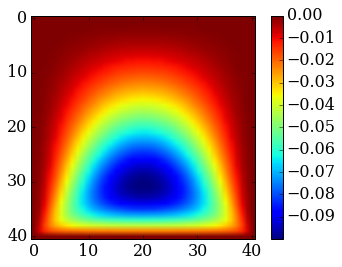

In [186]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.imshow(phi_f)
pyplot.colorbar()
pyplot.show()

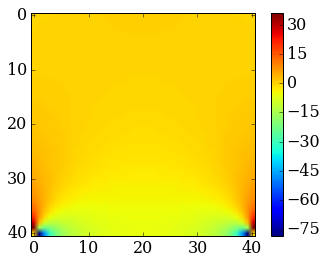

In [187]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.imshow(w_f)
pyplot.colorbar()
pyplot.show()

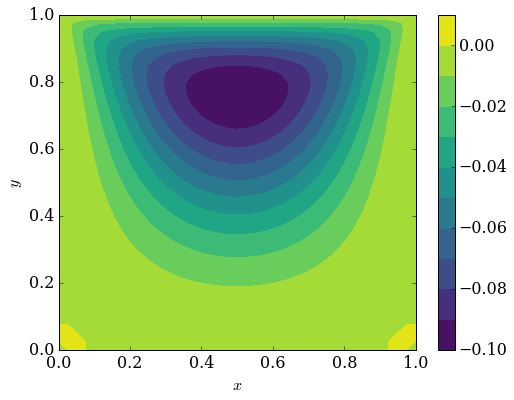

In [188]:
pyplot.figure(figsize=(8,6))
# 12 is the total number of levels we used to plot the contour
pyplot.contourf(X, Y, phi_f, 12, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();